# Data Preprocessing 

#### Importing important necessary packages and reading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
canada = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)
canada.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


#### Getting a brief idea about the data

In [3]:
canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      195 non-null    object
 1   Coverage  195 non-null    object
 2   OdName    195 non-null    object
 3   AREA      195 non-null    int64 
 4   AreaName  195 non-null    object
 5   REG       195 non-null    int64 
 6   RegName   195 non-null    object
 7   DEV       195 non-null    int64 
 8   DevName   195 non-null    object
 9   1980      195 non-null    int64 
 10  1981      195 non-null    int64 
 11  1982      195 non-null    int64 
 12  1983      195 non-null    int64 
 13  1984      195 non-null    int64 
 14  1985      195 non-null    int64 
 15  1986      195 non-null    int64 
 16  1987      195 non-null    int64 
 17  1988      195 non-null    int64 
 18  1989      195 non-null    int64 
 19  1990      195 non-null    int64 
 20  1991      195 non-null    int64 
 21  1992      195 no

#### Dropping The Unnecessary Columns

In [4]:
canada.drop(['AREA','REG','DEV','Type','Coverage'], inplace=True, axis='columns')

#### Renaming certain column names to simpler and easier to understand names

In [5]:
canada.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Continent-Region'}, inplace=True)

#### Adding a column to display the total immigration over the years for all countries

In [6]:
canada['TotalImmigration'] = canada.sum(axis='columns')

#### Checking for null values in the Data

In [7]:
canada.isnull().sum().sum() #Putting the second sum value so that all the null from all columns are also added

0

#### Changing the index of the data to the Country Name for better understanding

In [8]:
canada.set_index('Country', inplace = True)
canada.head()

,Continent,Continent-Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


#### Convert column names to String to have a unified format

In [9]:
canada.columns = list(map(str,canada.columns))
canada.columns

Index(['Continent', 'Continent-Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013', 'TotalImmigration'],
      dtype='object')

#### Filtering the data to see Asian countries with immigration greater than 10000

In [10]:
canada[(canada['Continent']=='Asia')&(canada['2013']>10000)]

,Continent,Continent-Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,TotalImmigration
Country,,,,,,,,,,,,,,,,,,,,,
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391


# Data Visualization

#### Making an x label to chart our plots against

In [11]:
years = list(map(str, range(1980,2014)))

#### Plotting the immigration data of India over the years

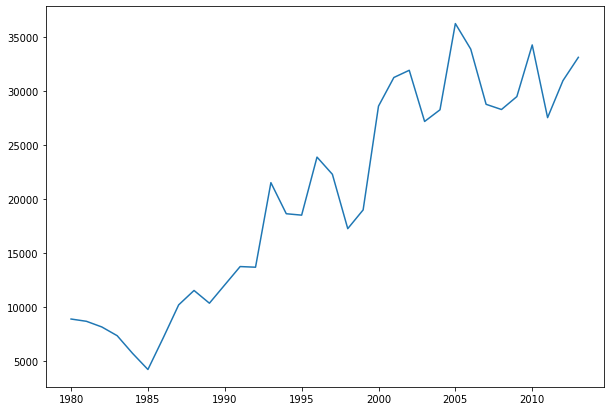

In [12]:
india = canada.loc['India', years]
india.plot(figsize = (10,7))

#### Adding Labels, Title and Point Description In The Graph

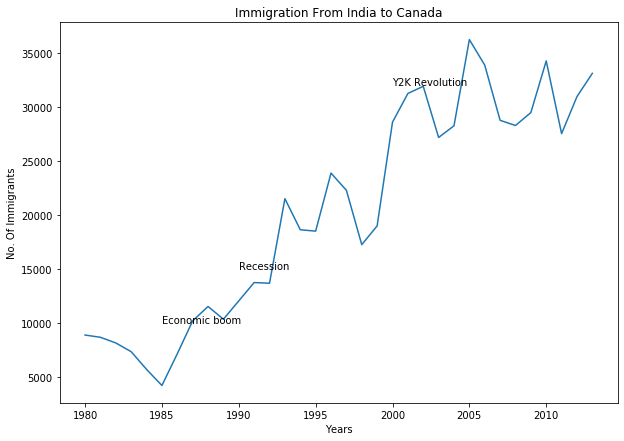

In [13]:
india.index = india.index.map(int)
india.plot(kind = 'line', figsize = (10,7))
plt.xlabel('Years')
plt.ylabel('No. Of Immigrants')
plt.title('Immigration From India to Canada')

plt.text(2000, 32000, 'Y2K Revolution')
plt.text(1990,15000,'Recession')
plt.text(1985,10000,'Economic boom')
plt.show()

#### Plotting the immigration data of China with Labels, Title and Point Description In The Graph

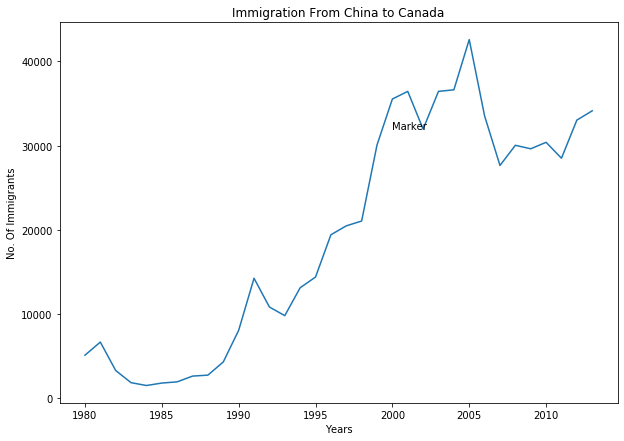

In [14]:
china = canada.loc['China', years]
china.index = china.index.map(int)
china.plot(kind = 'line', figsize = (10,7))
plt.xlabel('Years')
plt.ylabel('No. Of Immigrants')
plt.title('Immigration From China to Canada')

plt.text(2000, 32000, 'Marker')
plt.show()

#### Comparing the immigration trends of India and China

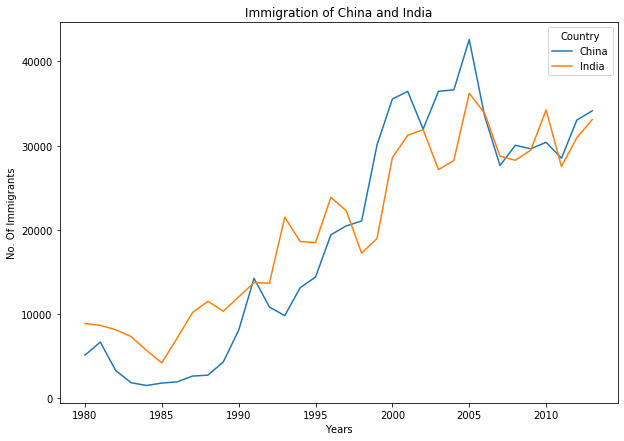

In [15]:
chinaindia = canada.loc[['China','India'], years]
new_chinaindia = chinaindia.transpose()
new_chinaindia.index = new_chinaindia.index.map(int)

new_chinaindia.plot(kind='line', figsize = (10,7))
plt.title('Immigration of China and India')
plt.xlabel('Years')
plt.ylabel('No. Of Immigrants')
plt.show()

#### Compare the immigration trends of France and Germany

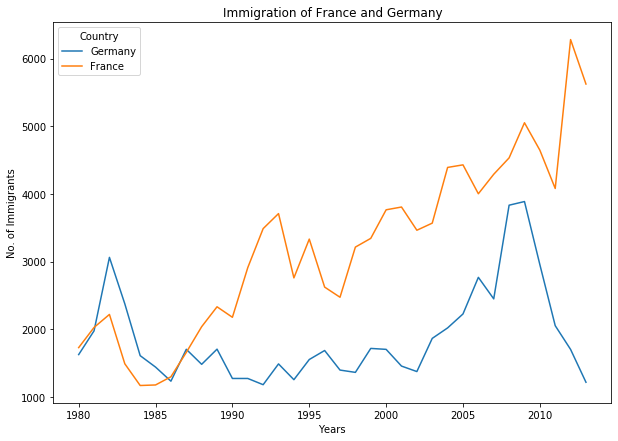

In [16]:
frager = canada.loc[['Germany','France'], years]
frager = frager.transpose()
frager.index = frager.index.map(int)

frager.plot(kind='line', figsize = (10,7))
plt.title('Immigration of France and Germany')
plt.xlabel('Years')
plt.ylabel('No. of Immigrants')
plt.show()

#### Top 5 countries to send immigrants to Canada

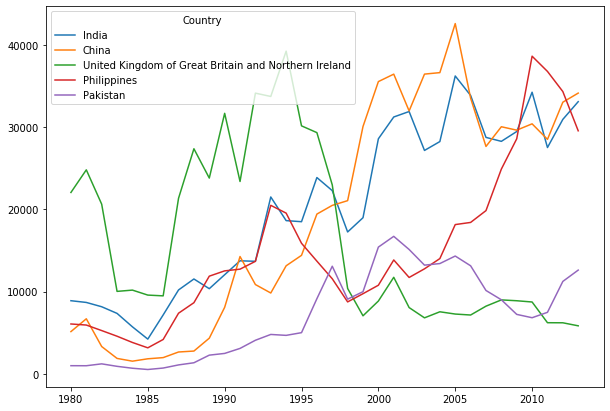

In [17]:
temp = canada.sort_values(by='TotalImmigration', ascending=False, axis='index')
temp = temp.head(5)
new_temp = temp[years].transpose()
new_temp.plot(figsize = (10,7))

#### Plotting Unstacked and Stacked Area Charts for the same data

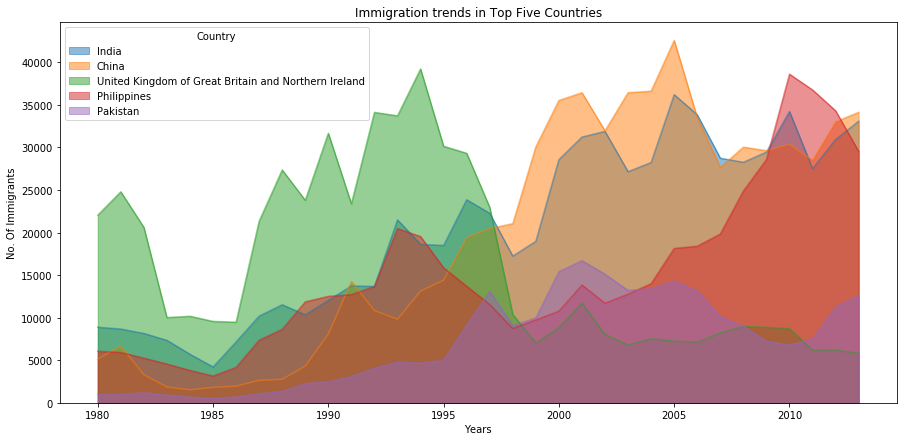

In [18]:
new_temp.index = new_temp.index.map(int)
new_temp.plot(kind="area", stacked=False, figsize=(15,7))

plt.title('Immigration trends in Top Five Countries')
plt.xlabel('Years')
plt.ylabel('No. Of Immigrants')
plt.show()

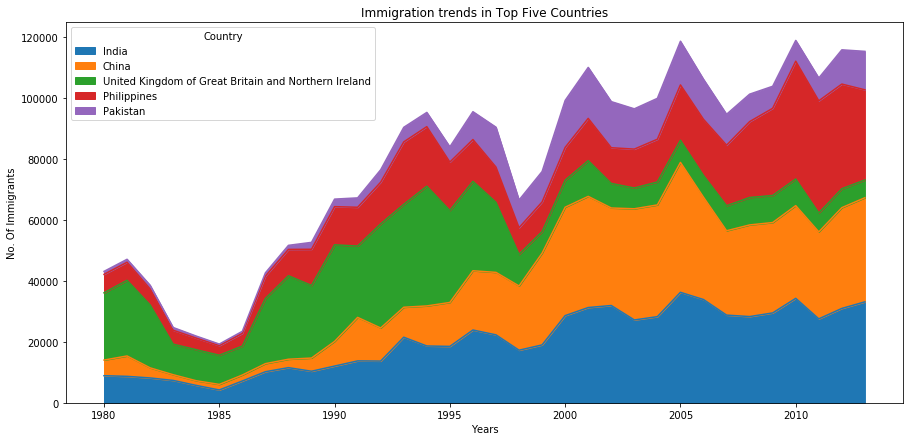

In [19]:
new_temp.plot(kind="area", stacked=True, figsize=(15,7))
#Add alpha parameter to add transparency to the area charts
plt.title('Immigration trends in Top Five Countries')
plt.xlabel('Years')
plt.ylabel('No. Of Immigrants')
plt.show()

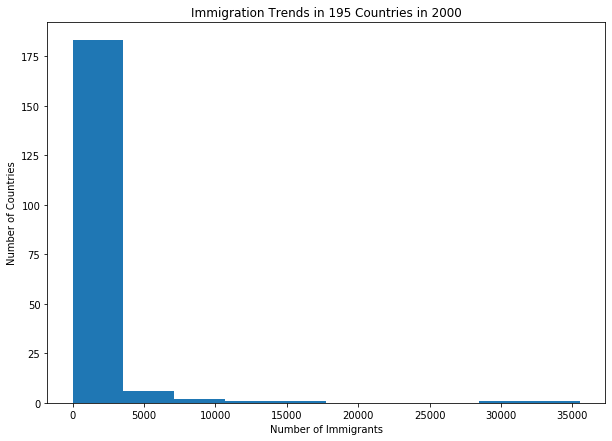

In [20]:
canada['2000'].plot(kind='hist', figsize=(10,7))

plt.title('Immigration Trends in 195 Countries in 2000')
plt.xlabel('Number of Immigrants')
plt.ylabel('Number of Countries')

plt.show()

#### Immigration Trends of 6 Countries across all years

Text(0, 0.5, 'No. Of Countries')

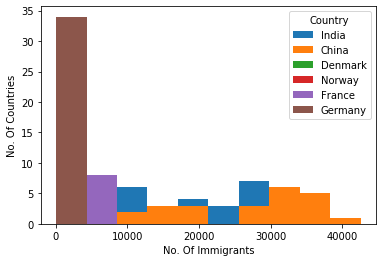

In [21]:
canada.loc[['India','China','Denmark','Norway','France','Germany'], years].transpose().plot.hist()
plt.xlabel('No. Of Immigrants')
plt.ylabel('No. Of Countries')

#### Plotting a Vertical Bar Plot for Immigration from India to Canada

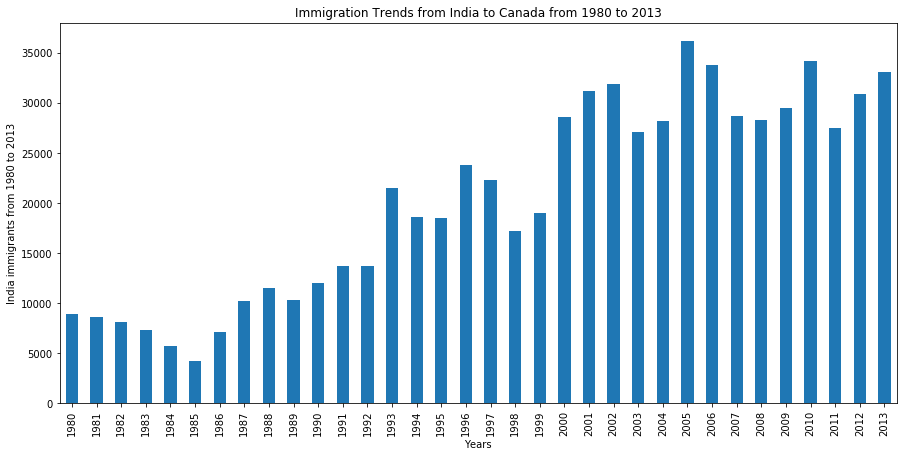

In [22]:
india.plot(kind='bar', figsize=(15,7))

plt.title('Immigration Trends from India to Canada from 1980 to 2013')
plt.xlabel('Years')
plt.ylabel('India immigrants from 1980 to 2013')
plt.show()

#### Annotating the graph to show more information

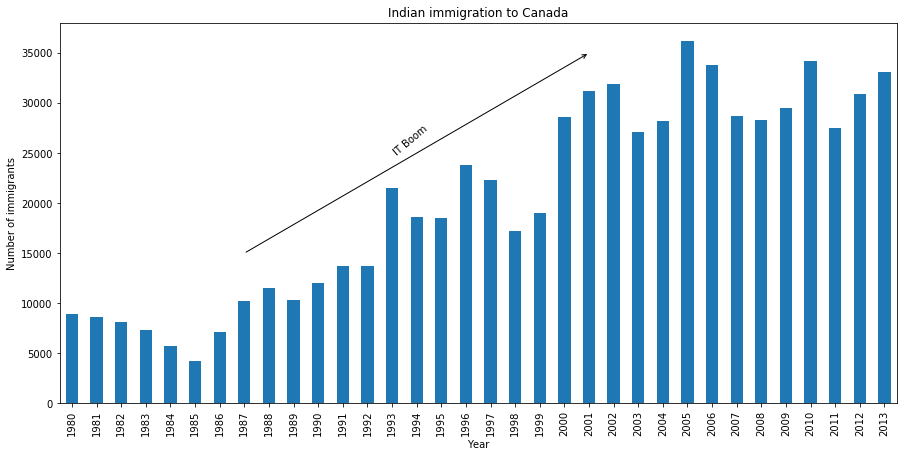

In [23]:
india.plot(kind='bar', figsize=(15,7))
plt.title("Indian immigration to Canada")
plt.xlabel("Year")
plt.ylabel("Number of immigrants")

plt.annotate('',  #arrow title
             xy=(21,35000), #x,y of arrow head
             xytext=(7,15000), #x, y of arrow tail
             xycoords='data',  #keep unchanged
             arrowprops=dict(arrowstyle='->',color='black') #arrow style with color
             )

plt.annotate('IT Boom', #add text to arrow
             xy=(13,28000),  #x, y of text position
             rotation=40, # counter clockwise rotate text by angle
             xycoords='data', #keep unchanged
             va='top', #position text 
             ha='left') #position text
plt.show()